In [213]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch.nn.functional as F

In [214]:
with open('../../outputs/bert/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

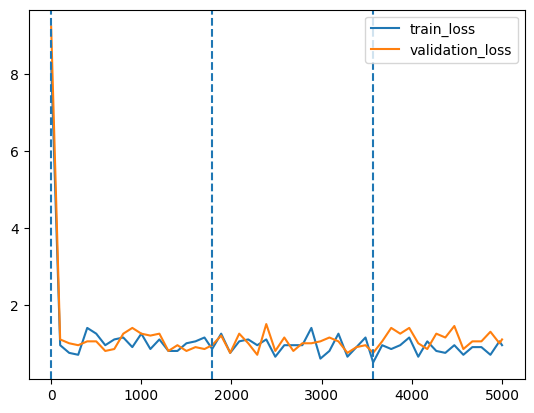

In [215]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

In [216]:
training_metrics[-1]['train_loss']

0.9500006437301636

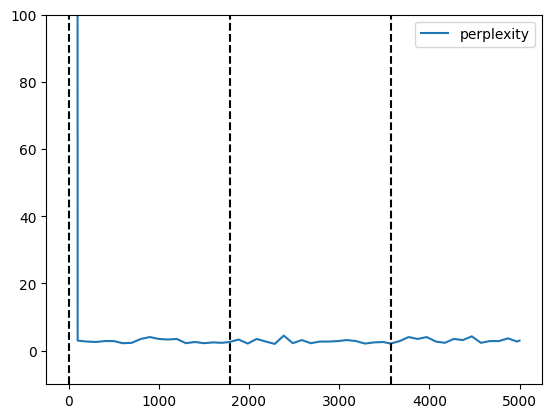

In [217]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

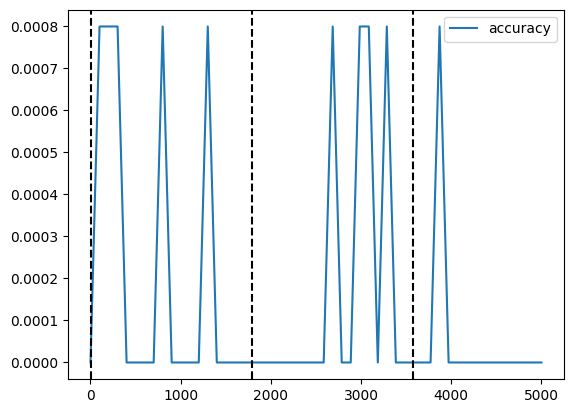

In [218]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [219]:
min([m['validation_loss'] for m in training_metrics])

0.7000013589859009

# Final Evaluation Outputs

In [227]:
food_names = np.load('../../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [228]:
len(training_metrics)

52

In [229]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [230]:
pd.set_option('max_colwidth', None)

In [231]:
input[1].shape

torch.Size([1000, 15])

In [232]:
output.shape

torch.Size([1000, 2, 1109])

In [236]:
F.sigmoid(output)[:,:,:].argmax(2)

tensor([[3, 4],
        [3, 4],
        [3, 3],
        ...,
        [3, 3],
        [3, 4],
        [3, 3]])

In [237]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[F.sigmoid(output)[:,:,:].argmax(2)].tolist(), 
})

,input,mask_pos,label,prediction
0,"[gelatin, water, <mask>, sugar, vanilla, cardamom, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[2, 0]","[yogurt, <pad>]","[angelica, kiwi]"
1,"[egg roll, sugar, pudding, <mask>, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[cinnamon, <pad>]","[angelica, kiwi]"
2,"[cracker, butter, sugar, flour, <mask>, water, cocoa powder, salt, potato chip, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>]","[9, 4]","[marshmallow, sauce]","[angelica, angelica]"
3,"[coffee, almond, curry powder, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[sugar substitute, <pad>]","[angelica, kiwi]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, <mask>, <mask>, <pad>, <pad>, <pad>, <pad>]","[10, 9]","[parsley, pepper]","[angelica, angelica]"
...,...,...,...,...
995,"[meat bouillon, <mask>, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[onion-family vegetable, <pad>]","[angelica, kiwi]"
996,"[chicken, sauce, walnut, sweet orange, <unknown>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[2, 0]","[walnut, <pad>]","[kiwi, kiwi]"
997,"[<mask>, cream, buttermilk, <mask>, curry powder, water, salt, flour, butter, vanilla, domestic pig, syrup, <pad>, <pad>, <pad>]","[0, 3]","[egg, honey]","[angelica, angelica]"
998,"[butter, <mask>, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[flour, <pad>]","[angelica, kiwi]"


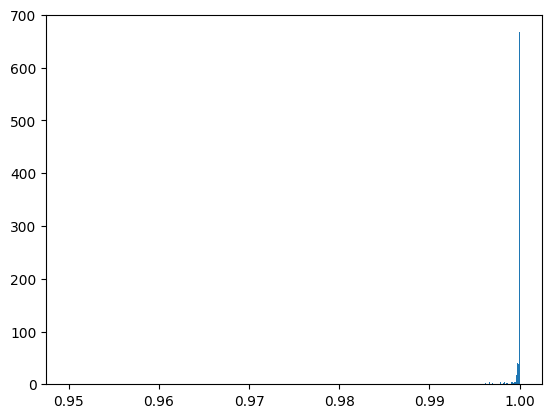

In [240]:
import torch.nn.functional as F
plt.hist(F.sigmoid(output[0,0,:]), bins=1000, range=(0.95,1));